In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_data = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
drug_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Menu Function

In [2]:
# This function is for when users pick the drugs from a menu
def menu():
    
    # This is where it grabs the entry from the user
    choice = input(">\n")
    
    # It then takes that entry and compares it to below. If it's outside of 1-9, it asks for hte entry again and loops back. 
    while choice != 1 or 2 or 3 or 4 or 5 or 6 or 7 or 8 or 9:   
        if choice == "1":
            return "Capomulin"
        elif choice == "2":
             return "Ceftamin"
        elif choice == "3":
            return "Infubinol"
        elif choice == "4":
            return "Ketapril"
        elif choice == "5":
            return "Naftisol"
        elif choice == "6":
            return "Propriva"
        elif choice == "7":
            return "Ramicane"
        elif choice == "8":
            return "Stelasyn"
        elif choice == "9":
            return "Zoniferol"
        else:
            print("Number has to be between 1 and 9. Enter the number.")
            choice = input(">\n")        

### User menu graphs to be displayed and compared to placebo

In [3]:
#This is the menu where users can choose the drugs they want graphed.  It will not allow them to type in an invalid number. 
print("Pick 3 drugs that will be used to compare to Placebo in the graphs below")
print("1 - Capomulin\n2 - Ceftamin\n3 - Infubinol\n4 - Ketapril\n5 - Naftisol\n6 - Propriva\n7 - Ramicane\n8 - Stelasyn\n9 - Zoniferol\n")

print("Enter the first number and hit Enter.")

#This uses the function where it grabs the entry from the user and stores it into the drug1 variable. 
drug1 = menu()

#Print out the content of he variable just to make it easier for the user to know what they picked. 
print(drug1)
print("\n")
print("Enter the second number and hit Enter.")

#it does the same here for the drug2 variable.  But then it also checks to see if the choice is a duplicate of drug1.  
#It asks for rentry and loops back. 
drug2 = menu()
while drug2 == drug1:
    print("Duplicate. Enter the second number again")
    drug2 = menu()
print(drug2)
print("\n")
print("Enter the third number and hit Enter.")    

#it gets the choice here and stores it to drug3.  Then it checks to see if it's a duplicate of drug1 or drug2.  
#it asks for reentry and loops back if it is a duplicate. 
drug3 = menu()
while drug3 == drug2 or drug3 == drug1:
    print("This is a duplicate. Enter the third number again.")
    drug3 = menu()
print(drug3)        
print("\n")

Pick 3 drugs that will be used to compare to Placebo in the graphs below
1 - Capomulin
2 - Ceftamin
3 - Infubinol
4 - Ketapril
5 - Naftisol
6 - Propriva
7 - Ramicane
8 - Stelasyn
9 - Zoniferol

Enter the first number and hit Enter.
>
1
Capomulin


Enter the second number and hit Enter.
>
3
Infubinol


Enter the third number and hit Enter.
>
4
Ketapril




## Tumor Response to Treatment

In [4]:
#drug_data, which is the raw data from the CSV file is grouped together using drug and timepoint here 
#and saved to drug_timepoint_df.  Then the data averaged for the tumor volume and saved into avg_tumor_vol.
drug_timepoint_df = drug_data.groupby(["Drug","Timepoint"])
avg_tumor_vol = drug_timepoint_df["Tumor Volume (mm3)"].mean()

# Since avg_tumor_vol is a series, it's converted to a dataframe here and the index is reset. 
avg_tumor_vol_df = pd.DataFrame({"Average Tumor Volume":avg_tumor_vol}).reset_index()

# Preview DataFrame
avg_tumor_vol_df.head()

,Drug,Timepoint,Average Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
#avg_tumor_vol_df is then pivoted to have timepoint as the index and the drugs as the columns. 
#Average tumor volume are the values
avg_tumor_pivot = avg_tumor_vol_df.pivot(index= "Timepoint", columns="Drug",values="Average Tumor Volume")

avg_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# The SEM is calulated from the drug_timepoint_df (before the average was calulated) and stored into sem_tumor_vol
sem_tumor_vol = drug_timepoint_df["Tumor Volume (mm3)"].sem()

# It is converted to a dataframe here. The index is reset so all the rows in the drug column are filled in.
sem_tumor_vol_df = pd.DataFrame({"Standard Error of Tumor Volumes":sem_tumor_vol}).reset_index()

# Preview DataFrame
sem_tumor_vol_df.head()

,Drug,Timepoint,Standard Error of Tumor Volumes
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# pivot the table with the Timepoint for rows and drug for columns.  SEM data are the values
sem_tumor_pivot = sem_tumor_vol_df.pivot(index= "Timepoint", columns="Drug",values="Standard Error of Tumor Volumes")

# Preview that Reformatting worked
sem_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


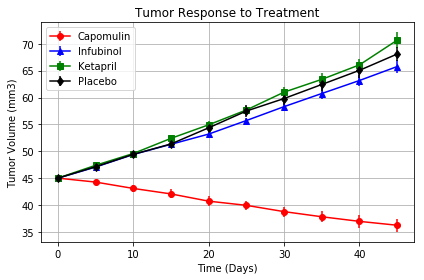

In [8]:
# First graph is created.  x is using static the Timepoint index numbers.  
# Since these are pretty universal for the rest of the graphs below, it makes more practical sense to static them. 
# x is the x axis.  It is the time in days.
x = [0,5,10,15,20,25,30,35,40,45]

# The first line we use the data from the mean DF.  The contents of  drug assigned to drug1 is used. 
y1 = avg_tumor_pivot[drug1]

# For the error bars, we pull the same coloumn that drug1 is using but on the SEM DF. 
err1 = sem_tumor_pivot[drug1]

# plot the errorbar.  x, the coloumn from the mean DF, the column from the SEM DF.  
plt.errorbar(x,y1, err1, marker ='o', color = "red")

# rinse and repeat from above for drug2 and drug3
y2 = avg_tumor_pivot[drug2]
err2 = sem_tumor_pivot[drug2]
plt.errorbar(x,y2, err2, marker ='^', color = "blue")

y3 = avg_tumor_pivot[drug3]
err3 = sem_tumor_pivot[drug3]
plt.errorbar(x,y3, err3, marker ='s', color = "green")

# This is the only static one all drugs will be compared to Placebo
y4 = avg_tumor_pivot["Placebo"]
err4 = sem_tumor_pivot["Placebo"]
plt.errorbar(x,y4, err4, marker ='d', color = "black")


plt.legend(loc="best")


plt.grid()

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()

plt.savefig("../Images/tumor_respose.png", bbox_inches = "tight")
plt.show()

## Metastatic Response to Treatment

In [9]:
# This graph will be simillar to the one above. 

# Average data is taken for the Metastatic Sites from the first dataframe
avg_meta_sites = drug_timepoint_df["Metastatic Sites"].mean()

# Convert to DataFrame and reset the index so that all the rows in the drug column are filled in
avg_meta_sites_df = avg_meta_sites.to_frame("Metastatic Sites").reset_index()

# Preview DataFrame
avg_meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# SEM data is taken for the Metastatic Sites from the first dataframe 
sem_meta_sites = drug_timepoint_df["Metastatic Sites"].sem()

# Convert to DataFrame and reset the index
sem_meta_sites_df = sem_meta_sites.to_frame("Metastatic Sites").reset_index()

# Preview DataFrame
sem_meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# pivot the data frames just like above
avg_meta_pivot = avg_meta_sites_df.pivot(index= "Timepoint", columns="Drug",values="Metastatic Sites")
sem_meta_pivot = sem_meta_sites_df.pivot(index= "Timepoint", columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
avg_meta_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
sem_meta_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


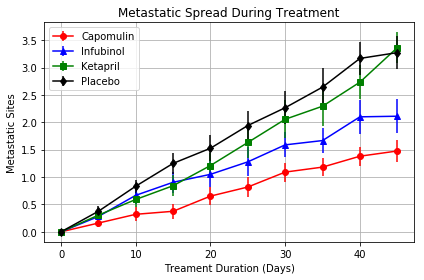

In [13]:
# Plot the graph exactly the same way as above. 
# x is the x axis.  It is the time in days.
x = [0,5,10,15,20,25,30,35,40,45]

y1 = avg_meta_pivot[drug1]
err1 = sem_meta_pivot[drug1]
plt.errorbar(x,y1, err1, marker ='o', color="red")

y2 = avg_meta_pivot[drug2]
err2 = sem_meta_pivot[drug2]
plt.errorbar(x,y2, err2, marker ='^', color="blue")

y3 = avg_meta_pivot[drug3]
err3 = sem_meta_pivot[drug3]
plt.errorbar(x,y3, err3, marker ='s', color="green")

y4 = avg_meta_pivot["Placebo"]
err4 = sem_meta_pivot["Placebo"]
plt.errorbar(x,y4, err4, marker ='d', color="black")


plt.legend(loc="best")


plt.grid()

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treament Duration (Days)")
plt.ylabel("Metastatic Sites")

plt.tight_layout()

plt.savefig("../Images/metastatic_spread.png", bbox_inches = "tight")
plt.show()





## Survival Rates

In [14]:
# This graph is almost the same as.  But we are taking the count of mouse ID to show how many mice have died. 

# take a count of the mice in the Mouse ID column and save the series to cnt_mouse
cnt_mouse = drug_timepoint_df["Mouse ID"].count()

# Convert to DataFrame
cnt_mouse_df = cnt_mouse.to_frame("Mouse Count").reset_index()

# Preview DataFrame
cnt_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Pivot the table like above
cnt_mouse_pivot = cnt_mouse_df.pivot(index= "Timepoint", columns="Drug",values="Mouse Count")

# Preview the Data Frame
cnt_mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
# convert the values to percent by taking the column and dividing by the last item in the column. 
# multiply it by 100. 
cnt_mouse_percent = (cnt_mouse_pivot/cnt_mouse_pivot.iloc[0,:])*100

# preview the DF
cnt_mouse_percent

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


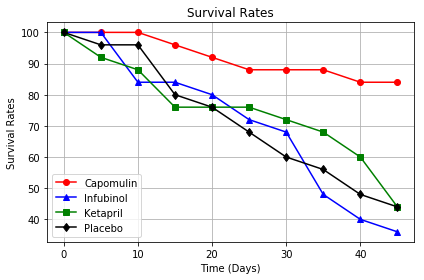

In [17]:
# Generate the plot just like above
# x is the x axis.  It is the time in days. 
x = [0,5,10,15,20,25,30,35,40,45]

plt.plot(x, cnt_mouse_percent[drug1], marker="o", color="red")
plt.plot(x, cnt_mouse_percent[drug2], marker="^", color="blue")
plt.plot(x, cnt_mouse_percent[drug3], marker="s", color="green")
plt.plot(x, cnt_mouse_percent["Placebo"], marker="d", color="black")

plt.title("Survival Rates")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates")

plt.grid()
plt.legend(loc="best")

plt.tight_layout()

plt.savefig("../Images/survival_rate.png", bbox_inches = "tight")
plt.show()






## Summary Bar Graph

In [18]:
# For this one we will take the data from the first graph.  Use the Average Tumor Volume. 

# Find the percentage of the volume buy taking the pivot of average tumor volume.
# Divide by the last value in the column and multiply the whole thing by 100
# just like in the survival graph. 
percent_tumor_pivot = (avg_tumor_pivot/avg_tumor_pivot.iloc[0,:])*100

#take the last item in the columns and subtract by the first item to get the change in percentage for the tumor size
percent_tumor_change = percent_tumor_pivot.iloc[-1,:] - percent_tumor_pivot.iloc[0,:]

# Display the data to confirm
percent_tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

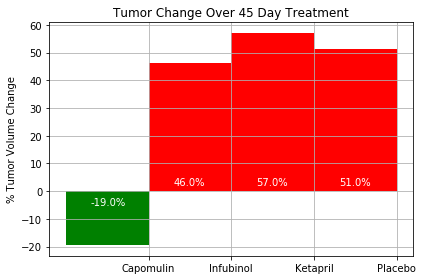

In [19]:
# Let's make a list of the drug names that is going to be used for the graph below. 
drug_names = [drug1,drug2,drug3,"Placebo"]

# how the xaxis is arranged based on the length of the drug_names list 
xaxis = np.arange(len(drug_names))          

# now we will plt the bar graph one by one while testing for value conditions.  
# We will use the contents of the drug_names list and test the value from the series above. 
# red for positive, green for negative. 
# At the same time we will also plot the text on each graph 

# This is for the text location on the graph
i=0

#Z is the item in the drug name list. 
for z in drug_names:
    
    # grabs the value for the drug and rounds it to 0 decimals
    label = round(percent_tumor_change[z],0)
    
    # now we test to see if the value in the series is greater than 0
    if percent_tumor_change[z] > 0:
        
        #plot the bar graph.  make it red if it's greater than 0
        plt.bar(z, percent_tumor_change[z], width = -1, align="edge", color="red")
        
        #take the label and change it to a string and add a % at the end of it.
        label = str(f"{label}%")
        
        #add the text to the graph in white and then increment i so it can put the next text on the next bar. 
        plt.text(i-.7,2,label,color="white")
        i += 1
        
    else:
        plt.bar(z, percent_tumor_change[z], width = -1, align="edge", color="green")
        label = str(f"{label}%")
        plt.text(i-.7,-5,label,color="white")
        i += 1
        
# I don't know what it does but it is all the class activities. I just C&Ped it. 
tick_locations = [value for value in xaxis]

# Use the drug names list as the tick names on the x axis
plt.xticks(tick_locations, drug_names) 

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
        
plt.grid()
plt.tight_layout()
plt.savefig("../Images/tumor_change.png", bbox_inches = "tight")
plt.show()